In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 10)
plt.style.use("ggplot")

### 1) API One-way ANOVA

In [2]:
def f_oneway_dict(data, alpha = 0.05, print_info = True):
    columns = data.keys()
    groups_means = [] # Средние всех групп
    groups_vars = [] # Дисперсии всех групп
    general_mean = 0 # Общее среднее
    N = 0; # Общее число наблюдений
    SST = 0 # общее число квадратов отклонений
    SSW = 0 # Факторная сумма квадратов отклонений 
    SSB = 0 # Сумма квадратов отклонений ошибки
    
    # Вычисляем среднее и дисперсии для каждой группы
    for column in columns:
        groups_means.append(data[column].mean())
        groups_vars.append(data[column].var())
    
    # Вычисляем общее число наблюдений
    for column in columns:
        N += len(data[column])
    
    
    # Вычисляем общее среднее
    for column in columns:
        len_column = len(data[column])
        
        for i in range(len_column):
            general_mean += data[column][i]
        
    general_mean = general_mean / N
    
    # Вычисляем общее число квадратов отклонений
    for column in columns:
        len_column = len(data[column])
        
        for i in range(len_column):
            SST += ((data[column][i] - general_mean) ** 2)
            
    # Вычисляем факторную сумму квадратов отклонений 
    for i, column in enumerate(columns):
        len_column = len(data[column])
        SSB += (len_column * ((groups_means[i] - general_mean) ** 2))
    
    # Вычисляем сумма квадратов отклонений ошибки
    SSW = SST - SSB
    
    df1 = len(columns) - 1
    df2 = N - len(columns)
    
    MSA  = SSB / df1
    MSE = SSW / df2
    

    f_statistics = MSA / MSE
    f_critical = stats.f.ppf(q = 1 - alpha, dfn = df1, dfd = df2)
    p_value = stats.f.sf(f_statistics, df1, df2)
    
    if print_info:
        print("-"*50)
        print("Общая информация: ") 
        for i, column in enumerate(columns):
            print("[{0}]. Среднее: {1}, дисперсия: {2}, стандартное отклонение: {3}".format(column, groups_means[i], 
                                                                                         np.round(groups_vars[i], 4),                                                                                  np.round((groups_vars[i]) ** (0.5), 4)))
        print("1. Сумма квадратов отклонений межгрупповая (SSB): ", SSB)
        print("2. Сумма квадратов отклонений внутригрупповая (SSW): ", SSW)
        print("3. Общая сумма квадратов отклонений (SST): ", SST)
        print("4. Межгрупповая дисперсия (MSA): ", MSA)
        print("5. Внутригрупповая дисперсия (MSE): ", MSE)
        print("6. Среднее всех наблюдений: ", general_mean)
        print("7. Число степеней свободы объяснённой дисперсии: ", df1)
        print("8. Число степеней свободы необъяснённой дисперсии: ", df2)
        print("9. Общее число степеней свободы: ", df1 + df2)
        print("Статистика: ")
        print("1. F-статистика: ", f_statistics)
        print("2. F-критическое: ", f_critical)
        print("3. p-value: ", p_value)
        print("-"*50)
    
    return f_statistics, p_value

### 2) График One-way ANOVA

In [3]:
def plot_f_oneway(f_statistical, m, k, alpha = 0.05):
    '''
    Рисует график F-распределения Фишера 
    
    Параметры
    ----------
    f_statistical: float or int
        Вычисленная F-статистика
        
    m: int
        Число групп / Количество колонок в таблице
        
    k: int
        Число наблюдений / Количество строчек в таблице
    
    alpha: float or int
        Предполагаемый уровень значимости
    '''
    
    f_critical = stats.f.ppf(q = 1 - alpha, dfn = m - 1, dfd = k - m)
    
    f_arange = np.arange(0, f_critical + 2, 0.01)
    f_vals = stats.f.pdf(f_arange, dfn = m - 1, dfd = k - m)
    
    plt.plot(f_arange, f_vals, color = 'k', label = "F-distribution")
    plt.ylim(0, f_vals.max())
    
    plt.axvline(f_critical, color = 'r', label = "f_critical", linestyle = "dashed")
    plt.axvline(f_statistical, color = 'b', label = "f_statistical")
    
    plt.fill_between(np.arange(f_statistical, f_critical + 2, 0.01), stats.f.pdf(np.arange(f_statistical, f_critical + 2, 0.01), dfn = m - 1, dfd = k - m), color = "dodgerblue")
    
    
    if f_statistical >= f_critical:
        print("Нулевая гипотеза отвергается! Мат. ожидания не равны")
    else:
        print("Нулевая гипотеза принимается! Мат. ожидания примерно равны!")
    
    print("f_statistical: ", f_statistical)
    print("f_critical: ", f_critical)
    
    plt.legend()

--------------------------------------------------
Общая информация: 
[2015]. Среднее: 7.4125, дисперсия: 0.0367, стандартное отклонение: 0.1916
[2016]. Среднее: 7.9325, дисперсия: 0.1571, стандартное отклонение: 0.3963
[2017]. Среднее: 7.29, дисперсия: 0.048, стандартное отклонение: 0.2191
[2018]. Среднее: 7.4625, дисперсия: 0.0414, стандартное отклонение: 0.2035
[2019]. Среднее: 8.2825, дисперсия: 0.1706, стандартное отклонение: 0.413
[2020]. Среднее: 7.88, дисперсия: 0.0563, стандартное отклонение: 0.2373
1. Сумма квадратов отклонений межгрупповая (SSB):  2.929300000000003
2. Сумма квадратов отклонений внутригрупповая (SSW):  1.5302999999999978
3. Общая сумма квадратов отклонений (SST):  4.459600000000001
4. Межгрупповая дисперсия (MSA):  0.5858600000000006
5. Внутригрупповая дисперсия (MSE):  0.08501666666666655
6. Среднее всех наблюдений:  7.710000000000001
7. Число степеней свободы объяснённой дисперсии:  5
8. Число степеней свободы необъяснённой дисперсии:  18
9. Общее число сте

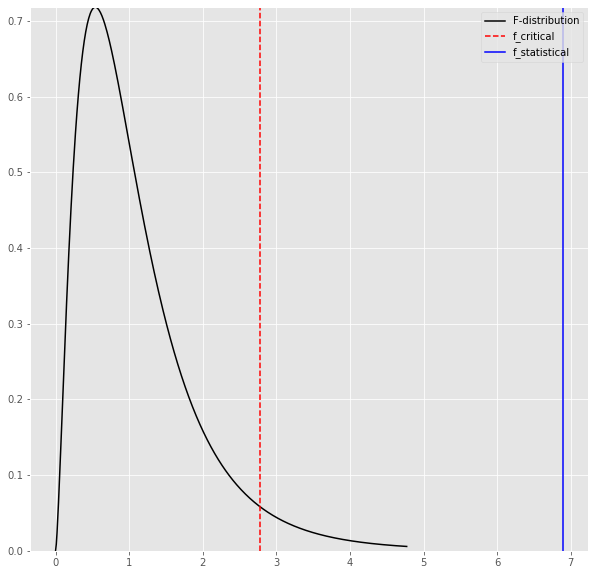

In [4]:
# Пример использования
df = {"2015": pd.Series([7.21, 7.55, 7.29, 7.6]), 
      "2016": pd.Series([7.89, 8.27, 7.39, 8.18]),
      "2017": pd.Series([7.25, 7.01, 7.37, 7.53]),
      "2018": pd.Series([7.75, 7.41, 7.27, 7.42]),
      "2019": pd.Series([7.7, 8.28, 8.55, 8.6]),
      "2020": pd.Series([7.56, 8.05, 8.07, 7.84])}

f_statistical, p_value = f_oneway_dict(df)
plot_f_oneway(f_statistical, 6, 24)

### 3) H-критерий Крускала-Уоллиса

In [5]:
statistics, p_value = stats.kruskal(df["2015"], df["2016"], df["2017"], df["2018"], df["2019"], df["2020"])

if p_value < 0.05:
    print("Медианы не равны! P-value: {}".format(p_value))
else:
    print("Медианы примерно равны. P-value: {}".format(p_value))

Медианы не равны! P-value: 0.010448137507967725
